# galaXYZ


**Copyright 2022 Astrobiology Center (Madrid, Spain)**


This file software allows to retrieve the three-dimensional shape of galaxies' morphological structures.


**:Settings:** 

Input parameters (i.e., ellipticity and position angle), usually retrieved from a two-dimensional decomposition of the galaxy's light into its morphological components, should be provided in a format compatible with the example *decomposition_values.dat*.


**:Authors:** 

Luca Costantin (lcostantin@cab.inta-csic.es), Jairo Méndez Abreu, Lorena Amaya Ruiz 


**:History:**

29 Aug 22:  version 1.0 (python notebook)


## Imports

Import packages necessary for this notebook.

In [1]:
import os
import sys
import math
import matplotlib.ticker

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy import stats
from scipy.stats import norm

plt.rcParams['font.family'] = 'serif'
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18


## Define convenience functions and parameters

Here we define some functions and some parameters that we will use repeatedly throughout the notebook.

In [2]:
def trunc(x):
    """Truncate the probabilities of ellipticity and position angle.

    Parameters
    ----------

    x : numpy.ndarray
        x-axis values
    
"""
    for i in range(len(x)):
        if x[i] < 10**(-10):
            x[i]=0 
    return x


In [3]:
def plot_2D(basample, casample):
    """Function to plot the probability ditribution of B/A and C/A.

    Parameters
    ----------

    basample : numpy.ndarray
        B/A probability distribution
    
    casample : numpy.ndarray
        C/A probability distribution

"""
    gs  = gridspec.GridSpec(2, 2, width_ratios=[3,1], height_ratios=[1,3], hspace=0, wspace=0)  
    fig = plt.figure(figsize=(10,10))
    ax0 = plt.subplot(gs[1,0])

    fig.set_facecolor('white')

    xmin = 0
    xmax = 1
    ymin = 0
    ymax = 1

    data_x = basample
    data_y = casample   

    X, Y = np.mgrid[xmin:xmax:51j, ymin:ymax:51j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([data_x, data_y])
        
    kernel = stats.gaussian_kde(values)
    ZZ = np.reshape(kernel(positions).T, X.shape)

    ax0.imshow(np.rot90(ZZ), cmap="Blues", extent=[xmin, xmax, ymin, ymax], aspect='auto')

    levels =  np.percentile(ZZ, [95.48, 99.73])
    origin = 'lower'
    ax0.contour(X, Y, ZZ, levels, colors=('gray','black'), linewidths=(1,))
    
    ax0.tick_params(direction='in', labelsize=20, length=12, width=2, pad=10)
    ax0.tick_params(direction='in', which='minor', length=5, width=1)
    
    ax0.set_xlabel('B/A', fontsize=24) 
    ax0.set_ylabel('C/A', fontsize=24) 
    ax0.set_xlim([xmin,xmax])
    ax0.set_ylim([ymin,ymax])
    
    ax0.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax0.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
    ax0.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        
    ax_ba = plt.subplot(gs[0,0])

    hist, bins = np.histogram(basample, bins=20, range=[xmin,xmax])
    weights = np.ones_like(basample)/float(len(basample))
    ax_ba.hist(basample, bins=bins, weights=weights, color='dodgerblue', edgecolor='navy', alpha=0.4)

    if (weights[0]*max(hist) < 1):
        yba_max = 1
        ax_ba.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax_ba.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.75):
        yba_max = 0.75
        ax_ba.set_yticks([0.25, 0.5, 0.75])
        ax_ba.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.5):
        yba_max = 0.5
        ax_ba.set_yticks([0.25, 0.5])
        ax_ba.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.25):
        yba_max = 0.25
        ax_ba.set_yticks([0.1, 0.2])
        ax_ba.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax_ba.get_xaxis().set_visible(False)
    ax_ba.set_xlim([xmin,xmax])
    ax_ba.set_ylim([ymin,yba_max])
    ax_ba.tick_params(direction='in', length=12, width=2, pad=10, labelsize=20)
    ax_ba.tick_params(direction='in', which='minor', length=5, width=1)
        
    ax_ca = plt.subplot(gs[1,1])
    
    hist, bins = np.histogram(casample, bins=20, range=[ymin,ymax])
    weights = np.ones_like(casample)/float(len(casample))
    ax_ca.hist(casample, bins=bins, weights=weights, orientation='horizontal', color='dodgerblue', edgecolor='navy', alpha=0.4)
    
    if (weights[0]*max(hist) < 1):
        xca_max = 1
        ax_ca.set_xticks([0.2, 0.4, 0.6, 0.8, 1])
        ax_ca.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.75):
        xca_max = 0.75
        ax_ca.set_xticks([0.25, 0.5, 0.75])
        ax_ca.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.5):
        xca_max = 0.5
        ax_ca.set_xticks([0.25, 0.5])
        ax_ca.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    if (weights[0]*max(hist) < 0.2):
        xca_max = 0.25
        ax_ca.set_xticks([0.1, 0.2])
        ax_ca.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax_ca.get_yaxis().set_visible(False)
    ax_ca.set_xlim([xmin,xca_max])
    ax_ca.set_ylim([ymin,ymax])
    ax_ca.tick_params(direction='in', length=12, width=2, pad=10, labelsize=20)
    ax_ca.tick_params(direction='in', which='minor', length=5, width=1)
   
    ax0.scatter(X[np.where(ZZ == np.max(ZZ))],Y[np.where(ZZ == np.max(ZZ))], marker='*', color='gold', edgecolor='black', s=600, alpha=1, zorder=2)
    
    BA_prob = X[np.where(ZZ == np.max(ZZ))]
    CA_prob = Y[np.where(ZZ == np.max(ZZ))]
        
    return BA_prob, CA_prob
    

In [4]:
def plot_3D(BA_prob, CA_prob):
    """Function to plot the 3d shape of the principal component.

    Parameters
    ----------

    BA_prob : numpy.ndarray
        B/A most probable value
    
    CA_prob : numpy.ndarray
        C/A most probable value

"""
    fig = plt.figure(figsize=(12,10)) 
    ax = fig.add_subplot(111, projection='3d')
    
# Ellipsoid equation:
    A = 1
    A_B_C = (A, BA_prob, CA_prob)  #Coefficients in x^2/A^2 + y^2/B^2 + z^2/C^2 = 1
    
# Set of all spherical angles:
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
    x = A * np.outer(np.cos(u), np.sin(v))
    y = BA_prob * np.outer(np.sin(u), np.sin(v))
    z = CA_prob * np.outer(np.ones_like(u), np.cos(v))

# Plot 3D     
    ax.plot_surface(x, y, z,  rstride=2, cstride=8, color='dodgerblue', alpha=0.8, edgecolors='navy', linewidth=0.5)
    
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    
    ax.grid(False)
    
    ax.set_xlabel('x (AU)', fontsize=22, labelpad=20) 
    ax.set_ylabel('y (AU)', fontsize=22, labelpad=20)
    ax.set_zlabel('z (AU)', fontsize=22, labelpad=20)
    
    ax.tick_params(axis='both', direction='in', which='major', length=12, width=2, labelsize=20, pad=10)
    ax.tick_params(axis='both', direction='in', which='minor', length=5, labelsize=20)
    
    ax.text(-1, -1, 2.1, f'B/A = {"%0.2f" % BA_prob}', color='black', fontsize=20)
    ax.text(-1, -1, 1.8, f'C/A = {"%0.2f" % CA_prob}', color='black', fontsize=20)
        
# Adjustment of the axes, so that they all have the same span:    
    for axis in 'xyz':
        getattr(ax, 'set_{}lim'.format(axis))((-1.2, 1.2))
        
    return


In [5]:
# Define the number of Monte Carlo simulations
number_iter = 50

# Define the seeds to repeat the same analysis 
seed1 = 1000
seed2 = 2000

# Define the number of points to populate the grid in the Monte Carlo analysis
nsimubox = 5000


## Input parameters

We read input parameters from the *decomposition_values.dat* file.

In [6]:
input_val = pd.read_csv('decomposition_values.dat', delimiter='\s+', comment='#', index_col=False)
input_val


,galaxy,q_comp,q_disk,PA_comp,PA_disk,errq_comp,errq_disk,errPA_comp,errPA_disk
0,NGC151,0.4,0.55,35.6,15.7,0.05,0.05,0.1,0.1


In [7]:
nn = len(input_val)

name = input_val['galaxy']

elcmeasu = input_val['q_comp'].values     # axial ratio (principal component)
eldmeasu = input_val['q_disk'].values     # axial ratio (disk)
pacmeasu = input_val['PA_comp'].values    # position angle (principal component)
padmeasu = input_val['PA_disk'].values    # position angle (disk)

elcerr = input_val['errq_comp'].values    # error of b/a (principal component)
elderr = input_val['errq_disk'].values    # error of b/a (disk)
pacerr = input_val['errPA_comp'].values   # error of PA (principal component)
paderr = input_val['errPA_disk'].values   # error of PA (disk)


## Trigonometric and Monte Carlo calculations


GALAXY:  NGC151

B/A: 0.42
C/A: 0.32



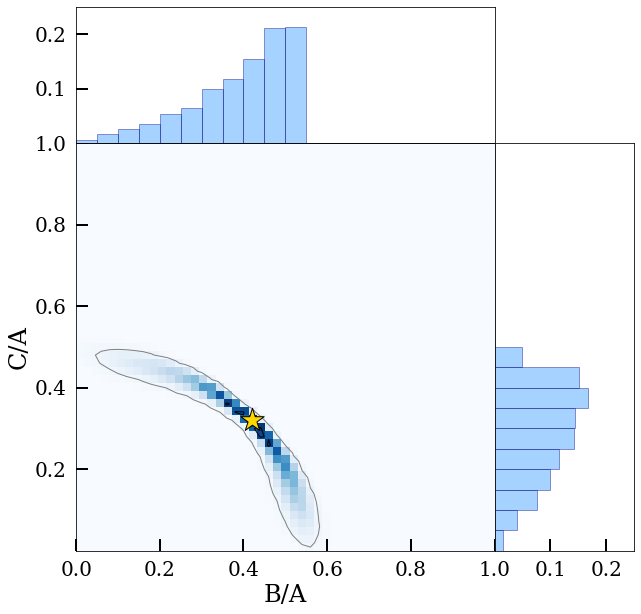

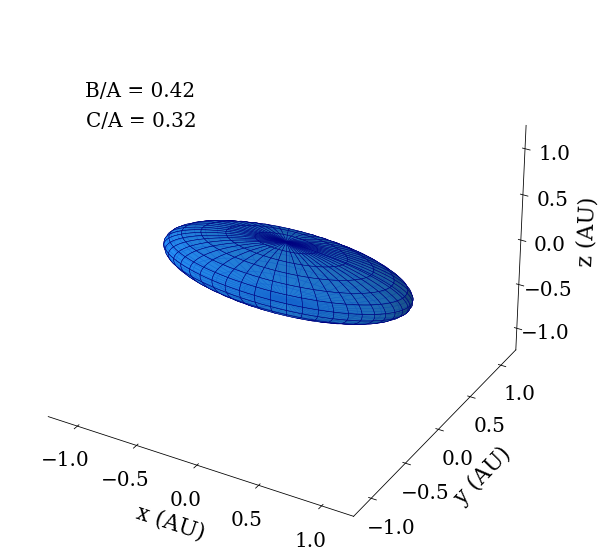

In [8]:
# Define an empty to store the inclinations of the galaxie
incl = np.zeros(len(elcmeasu))

# Define the arrays to store the maximum values of B/A and C/A for each galaxy
BA_prob_v = np.zeros(len(elcmeasu))
CA_prob_v = np.zeros(len(elcmeasu))

# Loop over each galaxy
for y in range(len(elcmeasu)):
    
    elc = np.zeros(number_iter)
    eld = np.zeros(number_iter)
    pac = np.zeros(number_iter)
    pad = np.zeros(number_iter)
    cad = np.zeros(number_iter)
    
    theta = np.zeros(number_iter)
    bam_v = np.zeros(len(elcmeasu))
    cam_v = np.zeros(len(elcmeasu))

# Angles between the x-axis and the LON on the equatorial plane of the bulge (x, y)
    PHIB = np.zeros(number_iter)
    PHIA = np.zeros(number_iter)
    PHIC = np.zeros(number_iter)

# Define the grid to populate with B/A and C/A values in MC analysis (51x51: [0,1]x[0,1])    
    bagrid = np.arange(101)/100
    cagrid = np.arange(101)/100 

    z = np.zeros((len(bagrid),len(cagrid)))
    
#  Generate geometrical parameters (considering their errors) for MC analysis:
#  Parameters are normally distributed (centered on their value with spread equal to sigma)
#  The ellipticity distribution is limited [0,1]
#  The PA distribution is limited [0,180]

    for i in range(number_iter):
        
        check = 0 # 0:badcomb, 1:continue

# Sample the ellipticity (truncated gaussian) to account for its error 
        while check==0:

            check = 1
            
            xprobell = np.arange(10001)/10000        
            probelc = np.exp(-(xprobell - elcmeasu[y])**2 / elcerr**2)
            probeld = np.exp(-(xprobell - eldmeasu[y])**2 / elderr**2) 
            probelc = probelc/sum(probelc)  # normalization
            probeld = probeld/sum(probeld)  # normalization

            trunc(probelc)          
            trunc(probeld)
            
            probelc = probelc / sum(probelc)  # normalization
            probeld = probeld / sum(probeld)  # normalization      
            elc[i] = np.random.choice(xprobell, p=probelc)
            eld[i] = np.random.choice(xprobell, p=probeld)
            
# Taking into account the median intrinsic thickness of disks (Rodriguez & Padilla 2013, Zoo morphologies included)
            mu_exp    = 0.267
            sigma_exp = 0.102
            np.random.seed(seed1)
            cad[i]=(np.random.standard_normal(1)) * sigma_exp + mu_exp
            np.random.seed(None)
            
# Sample the position angle (truncated gaussian) to account for its error 
            xprobpa = np.arange(10001)/10000*180
            probpac = np.exp(-(xprobpa-pacmeasu[y])**2/pacerr**2)
            probpad = np.exp(-(xprobpa-padmeasu[y])**2/paderr**2)
            probpac = probpac/sum(probpac)  # normalization
            probpad = probpad/sum(probpad)  # normalization
            
            trunc(probpac)          
            trunc(probpad)
            
            probpac = probpac/sum(probpac)  # normalization
            probpad = probpad/sum(probpad)  # normalization
            
# Checks
            if (padmeasu[y] != 180 and pacmeasu[y] != 180):
                pac[i] = np.random.choice(xprobpa, p=probpac)
                pad[i] = np.random.choice(xprobpa, p=probpad)
                
                if (elcmeasu[y] >= (1 - elcerr)):
                    pac[i] = pad[i] + pacerr
                if (eldmeasu[y] >= (1 - elderr)):
                    pad[i] = pac[i] + paderr
                    
# Consider the lack of knowledge in the PA. 
# If PA=180, generate the value randomly between [0;180]

            if (pacmeasu[y] == 180):
                pac[i] = pad[i] + pacerr
                pad[i] = np.random.choice(xprobpa)
                
                if (elcmeasu[y] >= (1 - elberr)):
                    pac[i] = pad[i] + pacerr
                if (eldmeasu[y] >= (1 - elderr)):
                    pad[i] = pac[i] + paderr
                    
            if (padmeasu[y] == 180):
                pad[i] = pac[i] + paderr
                pac[i] = np.random.choice(xprobpa)
                
                if (elcmeasu[y] >= (1 - elcerr)):
                    pac[i] = pad[i] + pacerr
                if (eldmeasu[y] >= (1 - elderr)):
                    pad[i] = pac[i] + paderr
            
# Check if the value of b/a is in the interval [0, 1]
            if (elc[i] > 1 or elc[i] < 0):
                check = 0
            if (eld[i] > 1 or eld[i] < 0):
                check = 0
                
# Check if the value of disk ellipticity is greater than the disk intrinsic shape  
            if ((eld[i])**2 <= (cad[i])**2):
                check = 0
                
# Check if the value of PA is in the interval [0, 180]
            if (pac[i] > 180 or pac[i] < 0):
                check = 0
            if (pad[i] > 180 or pad[i] < 0):
                check = 0
            
# End of checks         

##############################################################
# Define the relations between the different reference systems
        difpa = pac - pad
    
        if (difpa[i] > 0 and difpa[i] < 90):
            difpa[i] = difpa[i]

        if (difpa[i] > 90 and difpa[i] < 180):
            difpa[i] = 180 - difpa[i]

        if (difpa[i] > -180 and difpa[i] < -90):
            difpa[i] = 180 - abs(difpa[i])

        if (difpa[i] > -90 and difpa[i] < 0):
            difpa[i] = abs(difpa[i])
            
# Define the geometry of the problem for all the interations
        el_obs  = abs((1 - (elc**2))/(1 + (elc**2)))                        # Measured ellipticity of the principal component
        del_obs = (difpa*np.pi)/180                                         # Position angle difference in radiants
        eld_obs = eld                                                       # Measured ellipticity of the disk
        theta_v = np.arccos(np.sqrt((eld_obs**2 - cad**2)/(1 - cad**2)))    # Inclination of the system

# Define typical angles
        COSTHETA  = np.cos(theta_v[i])
        SINTHETA  = np.sin(theta_v[i])         
        SIN2DELTA = np.sin(2*del_obs[i])
        COS2DELTA = np.cos(2*del_obs[i])
        TANDELTA  = np.tan(del_obs[i])
        TAN2DELTA = np.tan(2*del_obs[i])
        TANPHIB   = el_obs[i]*SIN2DELTA/(COSTHETA*(1 + el_obs[i]*COS2DELTA))
        PHIB[i]   = np.arctan(TANPHIB)
        TAN2PHIC  = (2*el_obs[i]*SIN2DELTA*COSTHETA)/(el_obs[i]*COS2DELTA*(1 + COSTHETA**2) - (SINTHETA**2))
        PHIC[i]   = np.arctan(TAN2PHIC)/2
        
        if (PHIC[i] < 0):
            PHIC[i] = np.pi/2 + PHIC[i]
        
        TANPHIA = -1/TANPHIB
        PHIA[i] = np.arctan(TANPHIA)  
    
        PHIBAMAX     = (np.pi/4) + (PHIB[i]/2)
        SINPHIB      = np.sin(PHIB[i])
        COSPHIB      = np.cos(PHIB[i])
        SIN2PHICPHIB = np.sin(2*PHIC[i] - PHIB[i])
        COS2PHICPHIB = np.cos(2*PHIC[i] - PHIB[i])
        SINPHIC      = np.sin(PHIC[i])
        SIN2PHIC     = np.sin(2*PHIC[i])
        Ftheta       = (2*np.cos(theta_v[i])*np.cos(theta_v[i]))/(np.sin(theta_v[i])*np.sin(theta_v[i]))
    
#######################
# Start the MC analysis

        if (PHIC[i] < PHIBAMAX):
        
# Equatorial ellipticity of the principal component
            ZLIMIT = 1 - ((2*np.sin(PHIB[i]))/(np.sin(PHIB[i]) + np.sin(2*PHIC[i] - PHIB[i])))
    
            basample_func = np.arange(100000)/100000*np.sqrt(ZLIMIT) # Sampling Z from 0 to Z limit
                        
# Calculate P(B/A) using Eq. (34) in Méndez-Abreu et al. 2010
# ABS used to avoid -Nan due to number precision
            probba   = (2*basample_func*np.sin(PHIB[i]))/((PHIC[i] - PHIB[i])*(1 - basample_func**2)*np.sqrt(abs(((1 - basample_func**2)**2)-(np.sin(PHIB[i])**2*(1 + basample_func**2)**2))))
#           probba   = (2*basample_func*np.sin(PHIB[i]))/(abs((PHIC[i] - PHIB[i]))*abs((1 - basample_func**2))*np.sqrt(abs(((1 - basample_func**2)**2)-(np.sin(PHIB[i])**2*(1 + basample_func**2)**2))))
            basample = np.random.choice(basample_func[0:99999],p=probba[0:99999]/sum(probba[0:99999]),size=nsimubox) #LC

# Calculate C/A using Eq. (59) in Méndez-Abreu et al. 2010
# note: ca2 coefficient was wrongly derived in Eq. (59)        
            ca1 = SIN2PHICPHIB*np.sqrt(abs((1 - basample**2)**2 - (SINPHIB**2*(1 + basample**2)**2)))
            ca2 = SINPHIB*COS2PHICPHIB*(1 + basample**2)
            ca3 = np.ones(len(basample))*(2*SIN2PHIC/Ftheta)

            casample = np.sqrt(abs((ca1 - ca2)/ca3))
            
            rest     = ca1-ca2
            rest_ind = np.asarray(np.where(rest<0)).ravel()
            count    = len(rest_ind)
            
            if (count != 0):
                for q in range(count):
                    ind = count[q]
                    casample[ind] = 0

            g2 = 0           
            for g in range(1,len(bagrid)):
                k2 = 0
                for k in range(1,len(cagrid)):
                    cond_ind = np.asarray(np.where((basample>bagrid[g-1]) & (basample<bagrid[g]) & (casample>cagrid[k-1]) & (casample<cagrid[k]))).ravel()
                    z[len(bagrid)-1-(g2),k2] = z[len(bagrid)-1-g2,k2] + len(cond_ind)
                    k2 = k2 + 1
                
                g2 = g2 + 1    
            
        if (PHIC[i] > PHIBAMAX): 
            ZLIMIT = (1 - np.sin(PHIB[i]))/(1 + np.sin(PHIB[i]))
            ZC     = 1 - ((2*np.sin(PHIB[i]))/(np.sin(PHIB[i]) + np.sin(2*PHIC[i] - PHIB[i])))
            
            basample_func = np.arange(100000)/100000*np.sqrt(ZLIMIT)

            probba = np.zeros(len(basample_func))
            
            _inds = np.asarray(np.where(basample_func**2<ZC)).ravel()        
            for j in range(len(_inds)):
                probba[int(_inds[j])] = (2*basample_func[int(_inds[j])]*np.sin(PHIB[i]))/(((PHIC[i] - PHIB[i]))*((1 - basample_func[int(_inds[j])]**2))*np.sqrt(abs((1 - basample_func[int(_inds[j])]**2)**2) - (np.sin(PHIB[i])**2*(1 + basample_func[int(_inds[j])]**2)**2)))
           
            _inds2 = np.asarray(np.where(basample_func**2>ZC)).ravel() 
            for j in range(len(_inds2)):
                probba[int(_inds2[j])] = (4*basample_func[int(_inds2[j])]*np.sin(PHIB[i]))/(((PHIC[i]-PHIB[i]))*((1 - basample_func[int(_inds2[j])]**2))*np.sqrt(abs(((1 - basample_func[int(_inds2[j])]**2)**2) - (np.sin(PHIB[i])**2*(1 + basample_func[int(_inds2[j])]**2)**2))))
                    
            basample = np.random.choice(basample_func[0:99999], p=probba[0:99999]/sum(probba[0:99999]), size=nsimubox)
            
            ca1     = SIN2PHICPHIB*np.sqrt(abs((1 - basample**2)**2 - (SINPHIB**2*(1 + basample**2)**2)))
            ca1_neg = -SIN2PHICPHIB*np.sqrt(abs((1 - basample**2)**2 - (SINPHIB**2*(1 + basample**2)**2)))
            ca2     = SINPHIB*COS2PHICPHIB*(1 + basample**2)
            ca3     = np.ones(len(basample))*(2*SIN2PHIC/Ftheta)
            
            casample     = np.sqrt(abs((ca1 - ca2)/ca3))
            casample_neg = np.sqrt(abs((ca1_neg - ca2)/ca3))
            
# Checking infinite values in casample_neg
            casample_neg_b = np.zeros(len(casample_neg))
    
            for k in range(len(casample_neg)):
                if (math.isfinite(casample_neg[k]) == False):
                    casample_neg_b[k] = 0
                else:
                    casample_neg_b[k] = 1
                    
            indpos = np.asarray(np.where(casample_neg_b == 0)).ravel()
            indneg = np.asarray(np.where(casample_neg_b != 0)).ravel()    
            
            n_indpos = len(indpos)
            n_indneg = len(indneg)         
            
            if (n_indneg > 0):
                np.random.seed(seed2)
                ranindex = np.random.standard_normal((n_indneg,))
                np.random.seed(None)  
                r_inddown = np.asarray(np.where(ranindex < 0.5)).ravel()
                r_indup   = np.asarray(np.where(ranindex >= 0.5)).ravel()
                for j in range(len(r_inddown)):
                    casample[int(indneg[int(r_inddown[j])])] = casample[int(indneg[int(r_inddown[j])])]
                for j in range(len(r_indup)):
                    casample[int(indneg[int(r_indup[j])])] = casample_neg[int(indneg[int(r_indup[j])])]
            
            rest     = ca1 - ca2
            rest_ind = np.asarray(np.where(rest < 0)).ravel()
            count    = len(rest_ind)
            
            if (count != 0):
                for j in range(count):
                    ind = count[j]
                    casample[ind] = 0

            g2 = 0
            for g in range(1,len(bagrid)):
                k2 = 0
                for k in range(1,len(cagrid)):
                    cond_ind = np.asarray(np.where((basample>bagrid[g-1]) & (basample<bagrid[g]) & (casample>cagrid[k-1]) & (casample<cagrid[k]))).ravel()
                    z[len(bagrid)-1-g2,k2] = z[len(bagrid)-1-g2,k2]+len(cond_ind)
                    k2 = k2 + 1
                g2 = g2 + 1                

#######################################################################
# Make the 2D plot and calculate the most probable value of B/A and C/A

    BA_prob, CA_prob = plot_2D(basample=basample, casample=casample)

#######################################################################
# Make the 3D plot

    plot_3D(BA_prob=BA_prob, CA_prob=CA_prob)

    incl[y] = np.round(np.mean(theta_v)/np.pi*180)
    BA_prob_v[y] = BA_prob
    CA_prob_v[y] = CA_prob
    
    print('')
    print('GALAXY: ', name[y])
    print('')
    print('B/A:', "%.2f" % BA_prob[0])
    print('C/A:', "%.2f" % CA_prob[0])
    print('')
    

## Save results

In [9]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

final_results = pd.DataFrame()

final_results['Galaxy'] = input_val['galaxy']
final_results['inc']    = incl
final_results['B/A']    = BA_prob_v
final_results['C/A']    = CA_prob_v

final_results


,Galaxy,inc,B/A,C/A
0,NGC151,58.0,0.42,0.32


In [10]:
file_results = 'Final_results.txt'

if (os.path.isfile(file_results) == True):
    os.remove(file_results)

fr = open(file_results, 'a')
fr.write(final_results.to_string())
fr.close()
